In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/Jaimin09/Coding-Lane-Assets/main/Multiple%20Linear%20Regression%20in%20Python/train_data.csv")
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247694
1,1,2,20,3,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109011
2,2,3,60,3,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317167
3,3,4,70,3,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,11.849398
4,4,5,60,3,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429216


In [3]:
# save to DataFrame to csv file
train.to_csv("train_dataset.csv",index=False)

In [4]:
test = pd.read_csv("https://raw.githubusercontent.com/Jaimin09/Coding-Lane-Assets/main/Multiple%20Linear%20Regression%20in%20Python/test_data.csv")
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1200,1202,60,3,10400,1,3,3,0,0,...,0,0,0,0,0,3,2009,8,4,12.195517
1,1201,1203,50,4,6000,1,3,3,0,0,...,208,0,0,0,0,5,2009,8,4,11.669929
2,1202,1204,20,3,9750,1,3,3,0,4,...,0,0,0,0,0,10,2009,8,4,12.269047
3,1203,1205,20,3,10140,1,3,3,0,4,...,0,0,0,0,0,7,2006,8,4,11.941456
4,1204,1206,20,3,14684,1,0,3,0,1,...,0,0,0,0,0,6,2009,8,4,12.513190


In [5]:
# save dataframe to csv file in current directory
test.to_csv("test_dataset.csv",index=False)

In [6]:
# delete the unwanted feature from train and test data
train = train.drop(["Unnamed: 0", "Id"], axis=1)
test = test.drop(["Unnamed: 0", "Id"],axis= 1)

In [7]:
train.head()


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,12.247694
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,12.109011
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,12.317167
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,11.849398
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,12.429216


In [8]:
test.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,10400,1,3,3,0,0,0,5,...,0,0,0,0,0,3,2009,8,4,12.195517
1,50,4,6000,1,3,3,0,0,0,3,...,208,0,0,0,0,5,2009,8,4,11.669929
2,20,3,9750,1,3,3,0,4,0,5,...,0,0,0,0,0,10,2009,8,4,12.269047
3,20,3,10140,1,3,3,0,4,0,14,...,0,0,0,0,0,7,2006,8,4,11.941456
4,20,3,14684,1,0,3,0,1,0,20,...,0,0,0,0,0,6,2009,8,4,12.513190


In [9]:
# And now let's separate the X and Y.
train_data = train.values
Y = train_data[:,-1].reshape(train_data.shape[0],1)
X = train_data[:,:-1]

In [10]:
test_data = test.values
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)
X_test = test_data[:, :-1]

In [11]:
print("Shape of X_train :", X.shape)
print("Shape of Y_train :", Y.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", Y_test.shape)

Shape of X_train : (1200, 69)
Shape of Y_train : (1200, 1)
Shape of X_test : (258, 69)
Shape of Y_test : (258, 1)


We know that in linear regression we make our predictions by this
equation :
# y_pred = θ n x n + θ n−1 x n−1 + θ n−2 x n−2 +...+ θ 2 x 2 + θ1 x 1 + θ 0
And in python, we can write above equation as the matrix
multiplication of theta and X
# y_pred = matrix_mul(X,theta)

# So, we have data of 1200 houses in our dataset, and each house has 69
# features. Similarly, we have 258 houses in our dataset.

In [12]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

In [13]:
import numpy as np

def model(X, Y, learning_rate, iteration):
    m = Y.size  # Number of training examples
    theta = np.zeros((X.shape[1], 1))  # Initialize model parameters (weights)
    cost_list = []  # List to store the cost at each iteration

    for i in range(iteration):
        y_pred = np.dot(X, theta)  # Predict the output using current parameters
        cost = (1/(2*m)) * np.sum(np.square(y_pred - Y))  # Compute the cost (mean squared error)
        d_theta = (1/m) * np.dot(X.T, y_pred - Y)  # Compute the gradient
        theta = theta - learning_rate * d_theta  # Update the parameters using the gradient and learning rate
        cost_list.append(cost)  # Append the current cost to the list

        # Print the cost for every 10% of the iterations
        if i % (iteration // 10) == 0:
            print("Cost is :", cost)

    return theta, cost_list  # Return the final parameters and the cost list

# Example usage:
# X = ... (Your feature matrix)
# Y = ... (Your target variable)
# learning_rate = 0.01
# iteration = 1000
# theta, cost_list = model(X, Y, learning_rate, iteration)


In [14]:
iteration = 10000
learning_rate = 0.000000005
theta, cost_list = model(X, Y, learning_rate = learning_rate, iteration =
iteration)

Cost is : 72.37539364066856
Cost is : 0.02790416831031685
Cost is : 0.01725106537214416
Cost is : 0.01635527270554828
Cost is : 0.016158836087530753
Cost is : 0.01604095849845061
Cost is : 0.01594682732375345
Cost is : 0.015867896317230023
Cost is : 0.01580056801478539
Cost is : 0.015742355306482908


We can see our cost decreasing with every iteration. We can also plot a
graph of cost vs iteration

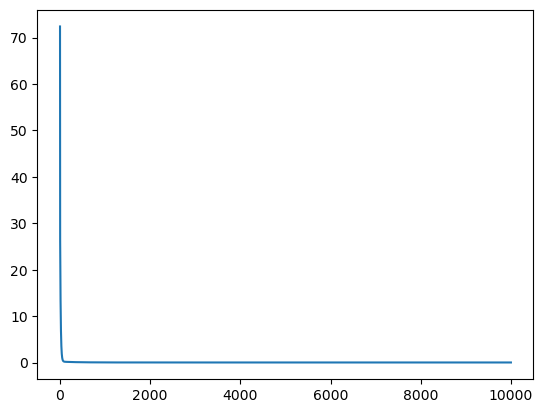

In [15]:
rng = np.arange(0,iteration)
plt.plot(rng, cost_list)
plt.show()

We will test the accuracy of our model on a test dataset. And for testing
accuracy, I'm going to calculate the error, and subtract the 1 by error, to
get the accuracy.
Below is the equation for the error :
# error = (1/m) * ∑|y_pred−Y|

In [16]:
y_pred = np.dot(X_test, theta)
error = (1/X_test.shape[0])*np.sum(np.abs(y_pred - Y_test))

In [17]:
print("Test error is :", error*100, "%")
print("Test Accuracy is :", (1- error)*100, "%")

Test error is : 12.95765879543164 %
Test Accuracy is : 87.04234120456836 %


Our model has 87 percent accuracy and we achieved that with just a
few lines of code !!

# next example

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a simple dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 2)
y = 4 + 3 * X[:,0] + 5 * X[:,1] + np.random.randn(100)

# Adding bias term (intercept) to feature matrix
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance


In [19]:
# Initialize Parameters
m = len(y)
theta = np.random.randn(3)  # random initialization of parameters


In [20]:
# Define the Cost Function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost


In [21]:
# Define Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history


In [22]:
# Train the Model
iterations = 1000
learning_rate = 0.01

theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)
print("Theta parameters:", theta)



Theta parameters: [4.1114726  2.83030102 4.97184797]


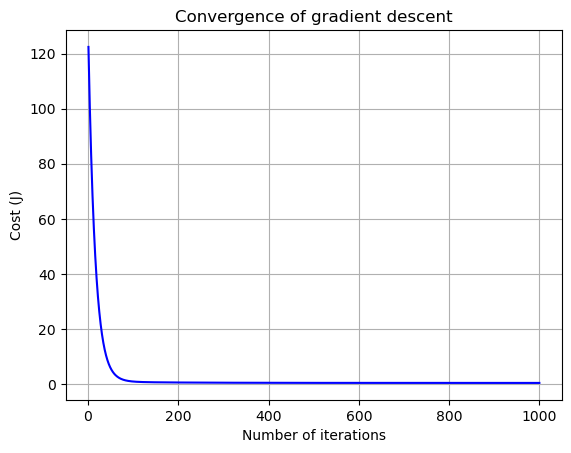

In [23]:
# Plot the Cost Function
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()
